In [ ]:
!python -m spacy download es_core_news_lg -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 568.0/568.0 MB 3.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_lg')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


In [2]:
import spacy
from spacy import displacy

In [32]:
nlp = spacy.load ('es_core_news_lg')


In [3]:
import requests
from bs4 import BeautifulSoup

In [33]:
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re
import matplotlib.pyplot as plt

In [34]:
import random

In [23]:
from collections import Counter

In [5]:
url = "https://dev.gutenberg.org/cache/epub/55514/pg55514-images.html"

In [7]:
soup = BeautifulSoup(contenido, "html.parser")
h1 = soup.find_all("h1")
print(h1)

[<h1> <img alt="CUENTOS DE AMOR" id="img_images_cuentos.png" src="images/cuentos.png"/></h1>]


In [14]:
# Descarga corpus de stopwords en español
nltk.download('stopwords')
stopwords_es = set(stopwords.words('spanish'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [15]:
# Funcion para limpiar texto

def limpiar_texto(texto):

# Lista de palabras a eliminar

  palabras_a_eliminar = ['dijo', 'así', 'aunque', 'sino', 'luego', 'pues', 'mientras',
        'después', 'antes', 'porque', 'cuando', 'cómo', 'donde', 'cap',
        'capítulo', 'verso', 'canto', 'á', 'ó', 'si' , 'tan' , 'fué' , 'gutenberg', 'work' , 'the', 'project', 'ebook','off', 'cuento' , 'cuentos', 'or','in','of','to', 'and']

# Agrego las palabras que quiero eliminar a las stopwords

  black_list = stopwords_es.union(palabras_a_eliminar)

  texto_minuscula = texto.lower() # convierte todo el texto en minusculas

  texto_sin_puntuacion = re.sub(r'[^\w\s]', '', texto_minuscula) # elimina todos los signos de puntuacion

  lista_palabras = texto_sin_puntuacion.split() # divide el texto en palabras individuales

  palabras_importantes = [] # crea lista de palabras importantes

  for palabra in lista_palabras:
    if palabra not in black_list:
      palabras_importantes.append(palabra)

  return palabras_importantes

In [16]:
texto_completo = soup.get_text()

palabras_limpias = limpiar_texto(texto_completo)

texto_limpio = ' '.join(palabras_limpias)

______________________________________________________________________________

In [17]:
doc = nlp(texto_limpio)

In [18]:
print([w.text for w in doc ]) #separa cada palabra y signo de puntuacion individualmente

['amor', 'emilia', 'pardo', 'bazán', 'amor', 'this', 'is', 'for', 'use', 'anyone', 'anywhere', 'united', 'states', 'most', 'other', 'parts', 'world', 'at', 'cost', 'with', 'almost', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'reuse', 'it', 'under', 'terms', 'license', 'included', 'with', 'this', 'online', 'at', 'wwwgutenbergorg', 'if', 'you', 'are', 'not', 'located', 'united', 'states', 'you', 'will', 'have', 'check', 'laws', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'title', 'amor', 'author', 'condesa', 'emilia', 'pardo', 'bazán', 'release', 'date', 'september', '9', '2017', '55514', 'most', 'recently', 'updated', 'october', '23', '2024', 'language', 'spanish', 'credits', 'produced', 'by', 'chuck', 'greif', 'online', 'distributed', 'proofreading', 'team', 'at', 'httpwwwpgdpnet', 'this', 'book', 'was', 'produced', 'from', 'scanned', 'images', 'public', 'domain', 'material', 'from', 'google', 'books', 'start', 'amor', '1

In [19]:
# Tokenizacion
tokens = [token.text for token in doc]
print(tokens)

['amor', 'emilia', 'pardo', 'bazán', 'amor', 'this', 'is', 'for', 'use', 'anyone', 'anywhere', 'united', 'states', 'most', 'other', 'parts', 'world', 'at', 'cost', 'with', 'almost', 'restrictions', 'whatsoever', 'you', 'may', 'copy', 'it', 'give', 'it', 'away', 'reuse', 'it', 'under', 'terms', 'license', 'included', 'with', 'this', 'online', 'at', 'wwwgutenbergorg', 'if', 'you', 'are', 'not', 'located', 'united', 'states', 'you', 'will', 'have', 'check', 'laws', 'country', 'where', 'you', 'are', 'located', 'before', 'using', 'this', 'title', 'amor', 'author', 'condesa', 'emilia', 'pardo', 'bazán', 'release', 'date', 'september', '9', '2017', '55514', 'most', 'recently', 'updated', 'october', '23', '2024', 'language', 'spanish', 'credits', 'produced', 'by', 'chuck', 'greif', 'online', 'distributed', 'proofreading', 'team', 'at', 'httpwwwpgdpnet', 'this', 'book', 'was', 'produced', 'from', 'scanned', 'images', 'public', 'domain', 'material', 'from', 'google', 'books', 'start', 'amor', '1

In [20]:
palabras_clave = []

In [21]:
for token in doc:
    if token.is_alpha and not token.is_stop:
      # Normalización: Obtener lema y convertir a minúsculas
      palabras_clave.append(token.lemma_.lower())

print(f"Se extrajeron {len(palabras_clave)} palabras clave (lemas, sin stop words).")
# Ejemplo de las primeras palabras extraídas:
print(f"Ejemplo: {palabras_clave[:15]}")

Se extrajeron 29736 palabras clave (lemas, sin stop words).
Ejemplo: ['amor', 'emilia', 'pardo', 'bazán', 'amor', 'this', 'is', 'for', 'usar', 'anyone', 'anywhere', 'united', 'states', 'most', 'other']


In [24]:
frecuencia_palabras = Counter(palabras_clave)

In [25]:
N = 15
palabras_mas_comunes = frecuencia_palabras.most_common(N)

In [26]:
for palabra, frecuencia in palabras_mas_comunes:
    print(f"- '{palabra}' : {frecuencia}")

- 'ver' : 134
- 'mujer' : 126
- 'ojo' : 123
- 'volver' : 83
- 'querer' : 83
- 'poder' : 80
- 'salir' : 80
- 'parecer' : 77
- 'corazón' : 76
- 'mano' : 75
- 'you' : 74
- 'pasar' : 73
- 'casa' : 71
- 'año' : 69
- 'hacer' : 68


In [30]:
wordcloud_generator = WordCloud(
    width=800,
    height=400,
    background_color='black',
    colormap='summer', # Paleta de colores
    max_words=50,      # Mostrar máximo 50 palabras
    stopwords=None,    # Ya filtramos stop words antes
    collocations=False # Evitar que agrupe palabras (ej. "dióxido carbono")
                       # Si se quisiera, sería mejor hacerlo antes con Spacy/N-gramas
).generate_from_frequencies(frecuencia_palabras) # <-- Usar las frecuencias calculadas

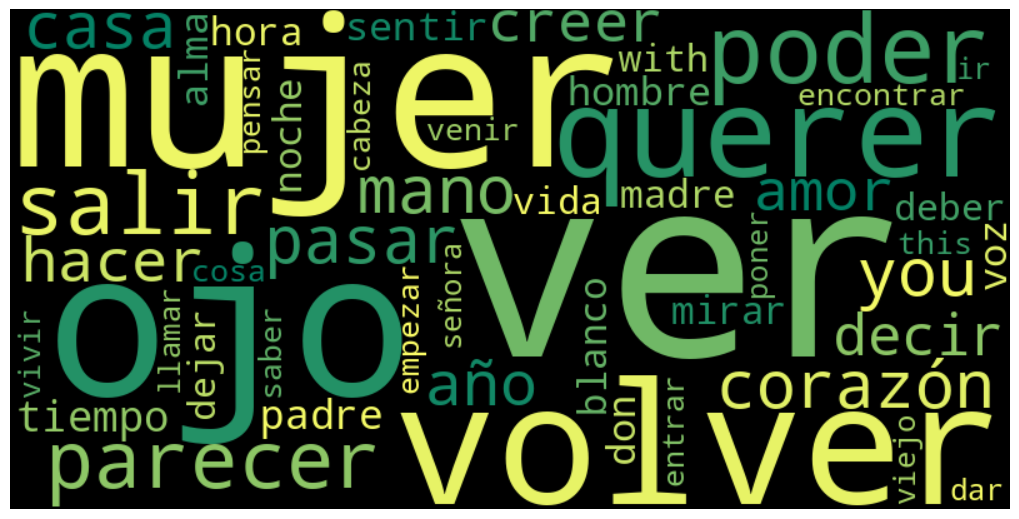

In [31]:
plt.figure(figsize=(10, 5)) # Tamaño de la figura donde se mostrará
plt.imshow(wordcloud_generator, interpolation='bilinear') # Mostrar la imagen generada
plt.axis("off") # No mostrar los ejes X e Y
plt.tight_layout(pad=0) # Ajustar para que no haya bordes extra
plt.show() # <-- ¡Mostrar la ventana con la nube!